In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
#load data 
world_cup = pd.read_csv('datasets/World Cup 2018 Dataset.csv')
results = pd.read_csv('datasets/results.csv')

In [ ]:
# data cleaning - there are some typos in the data ;-)
world_cup = world_cup.replace({"IRAN": "Iran",
                               "Costarica": "Costa Rica",
                               "Porugal": "Portugal",
                               "Columbia": "Colombia",
                               "Korea" : "Korea Republic"})

results =  results.replace({'Germany DR': 'Germany', 'China': 'China PR'})

In [ ]:
world_cup.head()

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,Unnamed: 19
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,NaN,NaN,Uruguay,33.0,0.0,0.0,NaN
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,NaN
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,NaN,NaN,Saudi Arabia,34.0,5.0,5.0,NaN
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0,NaN
4,Portugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0,NaN


In [11]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


In [12]:
#Adding goal difference and establishing who is the winner 
winner = []
for i in range (len(results['home_team'])):
    if results ['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results ['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Draw')
results['winning_team'] = winner

#adding goal difference column
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,Scotland,3


In [14]:
#lets work with a subset of the data one that includes games played by Nigeria in a Nigeria dataframe
df = results[(results['home_team'] == 'Germany') | (results['away_team'] == 'Germany')]
filtered = df.iloc[:]
filtered.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
38528,2017-10-08,Germany,Azerbaijan,5,1,FIFA World Cup qualification,Kaiserslautern,Germany,Germany,4
38609,2017-11-10,England,Germany,0,0,Friendly,London,England,Draw,0
38678,2017-11-14,Germany,France,2,2,Friendly,Cologne,Germany,Draw,0
38792,2018-03-23,Germany,Spain,1,1,Friendly,Düsseldorf,Germany,Draw,0
38865,2018-03-27,Germany,Brazil,0,1,Friendly,Berlin,Germany,Brazil,1


In [15]:
#creating a column for year and the first world cup was held in 1930
year = []
for row in filtered['date']:
    year.append(int(row[:4]))
filtered ['match_year']= year
filtered_1930 = filtered[filtered.match_year >= 1930]
filtered_1930.count()

date               863
home_team          863
away_team          863
home_score         863
away_score         863
tournament         863
city               863
country            863
winning_team       863
goal_difference    863
match_year         863
dtype: int64

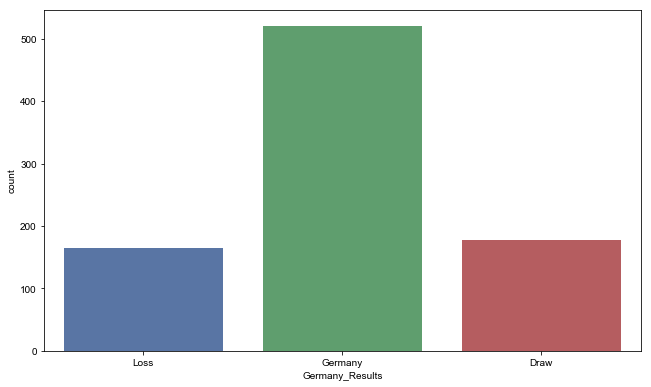

In [16]:
#what is the common game outcome for nigeria visualisation
wins = []
for row in filtered_1930['winning_team']:
    if row != 'Germany' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=[ 'Germany_Results'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Germany_Results', data=winsdf)

In [17]:
# wins is a good metric to analyze and predict outcomes of matches in the tournament 
#tournament and venue won't add much to our predictions
#historical match records will be used 


In [18]:
#narrowing to team patcipating in the world cup
worldcup_teams = ['Australia', ' Iran', 'Japan', 'Korea Republic', 
            'Saudi Arabia', 'Egypt', 'Morocco', 'Nigeria', 
            'Senegal', 'Tunisia', 'Costa Rica', 'Mexico', 
            'Panama', 'Argentina', 'Brazil', 'Colombia', 
            'Peru', 'Uruguay', 'Belgium', 'Croatia', 
            'Denmark', 'England', 'France', 'Germany', 
            'Iceland', 'Poland', 'Portugal', 'Russia', 
            'Serbia', 'Spain', 'Sweden', 'Switzerland']
df_teams_home = results[results['home_team'].isin(worldcup_teams)]
df_teams_away = results[results['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()







date               20565
home_team          20565
away_team          20565
home_score         20565
away_score         20565
tournament         20565
city               20565
country            20565
winning_team       20565
goal_difference    20565
dtype: int64

In [20]:
df_teams.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
38880,2018-03-27,Romania,Sweden,1,0,Friendly,Craiova,Romania,Romania,1
38881,2018-03-27,Bosnia-Herzegovina,Senegal,0,0,Friendly,Le Havre,France,Draw,0
38883,2018-03-27,Peru,Iceland,3,1,Friendly,Harrison,USA,Peru,2
38885,2018-03-27,Tunisia,Costa Rica,1,0,Friendly,Nice,France,Tunisia,1
38887,2018-03-27,Poland,Korea Republic,3,2,Friendly,Chorzów,Poland,Poland,1


In [21]:
#create an year column to drop games before 1930
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head()



,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference,match_year
1230,1930-01-01,Spain,Czechoslovakia,1,0,Friendly,Barcelona,Spain,Spain,1,1930
1231,1930-01-12,Portugal,Czechoslovakia,1,0,Friendly,Lisbon,Portugal,Portugal,1,1930
1237,1930-02-23,Portugal,France,2,0,Friendly,Porto,Portugal,Portugal,2,1930
1238,1930-03-02,Germany,Italy,0,2,Friendly,Frankfurt am Main,Germany,Italy,2,1930
1240,1930-03-23,France,Switzerland,3,3,Friendly,Colombes,France,Draw,0,1930


In [22]:
#dropping columns that wll not affect matchoutcomes
df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference', 'match_year'], axis=1)
df_teams_1930.tail()

,home_team,away_team,winning_team
38880,Romania,Sweden,Romania
38881,Bosnia-Herzegovina,Senegal,Draw
38883,Peru,Iceland,Peru
38885,Tunisia,Costa Rica,Tunisia
38887,Poland,Korea Republic,Poland


In [24]:
#Building the model
#the prediction label: The winning_team column will show "2" if the home team has won, "1" if it was a tie, and "0" if the away team has won.

df_teams_1930 = df_teams_1930.reset_index(drop=True)
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.home_team,'winning_team']=2
df_teams_1930.loc[df_teams_1930.winning_team == 'Draw', 'winning_team']=1
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.away_team, 'winning_team']=0

df_teams_1930.tail()

,home_team,away_team,winning_team
20560,Romania,Sweden,2
20561,Bosnia-Herzegovina,Senegal,1
20562,Peru,Iceland,2
20563,Tunisia,Costa Rica,2
20564,Poland,Korea Republic,2


In [25]:
#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(df_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
final.tail()

,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
20560,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20561,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20562,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20563,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20564,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.572
Test set accuracy:  0.556


In [33]:
#adding Fifa rankings
#the team which is positioned higher on the FIFA Ranking will be considered "favourite" for the match
#and therefore, will be positioned under the "home_teams" column
#since there are no "home" or "away" teams in World Cup games. 

# Loading new datasets
ranking = pd.read_csv('datasets/fifa_rankings.csv') 
fixtures = pd.read_csv('datasets/fixtures.csv')

# List for storing the group stage games
pred_set = []

In [34]:
# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Away Team'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:48, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Home Team,Away Team,Group,Result
43,3,6.0,23.0,27/06/2018 21:00,Nizhny Novgorod Stadium,Switzerland,Costa Rica,Group E,NaN
44,3,61.0,8.0,28/06/2018 17:00,Volgograd Stadium,Japan,Poland,Group H,NaN
45,3,27.0,16.0,28/06/2018 17:00,Samara Stadium,Senegal,Colombia,Group H,NaN
46,3,55.0,21.0,28/06/2018 21:00,Saransk Stadium,Panama,Tunisia,Group G,NaN
47,3,13.0,3.0,28/06/2018 21:00,Kaliningrad Stadium,England,Belgium,Group G,NaN


In [36]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()

,away_team,home_team,winning_team
0,Russia,Saudi Arabia,None
1,Egypt,Uruguay,None
2,Morocco,Iran,None
3,Spain,Portugal,None
4,Australia,France,None


In [37]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Remove winning team column
pred_set = pred_set.drop(['winning_team'], axis=1)

pred_set.head()

,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#group matches 
predictions = logreg.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 2:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    elif predictions[i] == 1:
        print("Draw")
    elif predictions[i] == 0:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    print("")

Saudi Arabia and Russia
Winner: Russia
Probability of Saudi Arabia winning:  0.142
Probability of Draw:  0.293
Probability of Russia winning:  0.565

Uruguay and Egypt
Winner: Uruguay
Probability of Uruguay winning:  0.590
Probability of Draw:  0.341
Probability of Egypt winning:  0.069

Iran and Morocco
Draw
Probability of Iran winning:  0.236
Probability of Draw:  0.429
Probability of Morocco winning:  0.335

Portugal and Spain
Draw
Probability of Portugal winning:  0.297
Probability of Draw:  0.351
Probability of Spain winning:  0.351

France and Australia
Winner: France
Probability of France winning:  0.628
Probability of Draw:  0.222
Probability of Australia winning:  0.151

Argentina and Iceland
Winner: Argentina
Probability of Argentina winning:  0.822
Probability of Draw:  0.144
Probability of Iceland winning:  0.034

Peru and Denmark
Winner: Peru
Probability of Peru winning:  0.440
Probability of Draw:  0.166
Probability of Denmark winning:  0.394

Croatia and Nigeria
Winner: 

In [39]:
# List of tuples before 
group_16 = [('Uruguay', 'Portugal'),
            ('France', 'Croatia'),
            ('Brazil', 'Mexico'),
            ('England', 'Colombia'),
            ('Spain', 'Russia'),
            ('Argentina', 'Peru'),
            ('Germany', 'Switzerland'),
            ('Poland', 'Belgium')]

In [40]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to FIFA ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better, he will be the 'home' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'home_team': matches[j][0], 'away_team': matches[j][1]})
        else:
            dict1.update({'home_team': matches[j][1], 'away_team': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1

    # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    # Remove winning team column
    pred_set = pred_set.drop(['winning_team'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        elif predictions[i] == 1:
            print("Draw")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ' , '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1])) 
        print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print("")

In [41]:
clean_and_predict(group_16, ranking, final, logreg)

Portugal and Uruguay
Winner: Portugal
Probability of Portugal winning:  0.429
Probability of Draw:  0.290
Probability of Uruguay winning:  0.281

France and Croatia
Winner: France
Probability of France winning:  0.466
Probability of Draw:  0.268
Probability of Croatia winning:  0.266

Brazil and Mexico
Winner: Brazil
Probability of Brazil winning:  0.691
Probability of Draw:  0.206
Probability of Mexico winning:  0.103

England and Colombia
Winner: England
Probability of England winning:  0.534
Probability of Draw:  0.348
Probability of Colombia winning:  0.117

Spain and Russia
Winner: Spain
Probability of Spain winning:  0.550
Probability of Draw:  0.267
Probability of Russia winning:  0.182

Argentina and Peru
Winner: Argentina
Probability of Argentina winning:  0.719
Probability of Draw:  0.209
Probability of Peru winning:  0.072

Germany and Switzerland
Winner: Germany
Probability of Germany winning:  0.671
Probability of Draw:  0.199
Probability of Switzerland winning:  0.131

Be

In [42]:
# List of matches
quarters = [('Portugal', 'France'),
            ('Spain', 'Argentina'),
            ('Brazil', 'England'),
            ('Germany', 'Belgium')]

In [43]:
clean_and_predict(quarters, ranking, final, logreg)

Portugal and France
Winner: Portugal
Probability of Portugal winning:  0.432
Probability of Draw:  0.282
Probability of France winning:  0.286

Argentina and Spain
Winner: Argentina
Probability of Argentina winning:  0.523
Probability of Draw:  0.255
Probability of Spain winning:  0.222

Brazil and England
Winner: Brazil
Probability of Brazil winning:  0.504
Probability of Draw:  0.233
Probability of England winning:  0.262

Germany and Belgium
Winner: Germany
Probability of Germany winning:  0.587
Probability of Draw:  0.249
Probability of Belgium winning:  0.163



In [44]:
# List of matches
semi = [('Portugal', 'Brazil'),
        ('Argentina', 'Germany')]

In [45]:
clean_and_predict(semi, ranking, final, logreg)

Brazil and Portugal
Winner: Brazil
Probability of Brazil winning:  0.689
Probability of Draw:  0.162
Probability of Portugal winning:  0.149

Germany and Argentina
Winner: Germany
Probability of Germany winning:  0.454
Probability of Draw:  0.258
Probability of Argentina winning:  0.287



In [46]:
# Finals
finals = [('Brazil', 'Germany')]

In [47]:
clean_and_predict(finals, ranking, final, logreg)

Germany and Brazil
Winner: Brazil
Probability of Germany winning:  0.386
Probability of Draw:  0.210
Probability of Brazil winning:  0.404

